### Tempos dos vídeos
- (IT) Insulina Tradicional (15:00) $\rightarrow$ 900 segundos
- (GT) Glucagon Tradicional (14:57) $\rightarrow$ 897 segundos
- (IA) Insulina Ativa (19:26) $\rightarrow$ 1166 segundos
- (GA) Glucagon Ativa (20:43) $\rightarrow$ 1243 segundos

### Participantes
- André: IT e GA
- Daniella: IT e GA
- Emily: IT e GA
- Guilherme: IT e GA
- Murilo: GT e IA
- Nathalia: GT e IA
- Victoria: GT e IA
- Yasmim: GT e IA
- Izabel: N/A

In [1]:
# imports de bibliotecas

import numpy as np
import mne
from scipy.signal import welch
import matplotlib.pyplot as plt

In [2]:
# definição do info (MNE)

n_channels = 8
ch_types = ['eeg'] * n_channels
sfreq = 250
ch_names = ["F3", "Fz", "F4", "C3", "Cz", "C4", "P3", "P4"]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage("standard_1020")

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [3]:
# carregamento e organização dos dados de: Daniella

# aula -> 99750 até 296500 (ga1) | 5250 até 119250 (ga2) [1243 segundos]
# teste -> 126750 até 158000 (ga2) [125 segundos]
ga = ['dataset/Daniella/GA/OpenBCI-RAW-2023-10-26_12-43-47.txt',
      'dataset/Daniella/GA/OpenBCI-RAW-2023-10-26_13-06-25.txt']
ga_ob = [np.loadtxt(txt, delimiter=',', skiprows=5, usecols=range(1, 9)) for txt in ga]
data_ga = np.concatenate((ga_ob[0][99750:296501,:], ga_ob[1][5250:119250,:]))
data_ga_test = ga_ob[1][126750:158001,:]

# aula -> 48250 até 162000 (it1) | 500 até 111750 (it2) [900 segundos]
# teste -> 119250 até 162000 (it2) [171 segundos]
it = ['dataset/Daniella/IT/OpenBCI-RAW-2023-10-05_13-28-15.txt',
      'dataset/Daniella/IT/OpenBCI-RAW-2023-10-05_13-44-46.txt']
it_ob = [np.loadtxt(txt, delimiter=',', skiprows=5, usecols=range(1, 9)) for txt in it]
data_it = np.concatenate((it_ob[0][48250:162001,:], it_ob[1][500:111750,:]))
data_it_test = it_ob[1][119250:162001,:]

# 26250 até 152250 [504 segundos]
test = 'dataset/Daniella/test/OpenBCI-RAW-2023-11-28_15-22-35.txt'
test_ob = np.loadtxt(test, delimiter=',', skiprows=5, usecols=range(1, 9))
data_test = test_ob[26250:152251,:]

In [4]:
X = {
    'ga': mne.io.RawArray(data_ga.T, info),
    'ga_test': mne.io.RawArray(data_ga_test.T, info),
    'it': mne.io.RawArray(data_it.T, info),
    'it_test': mne.io.RawArray(data_it_test.T, info),
    'test': mne.io.RawArray(data_test.T, info)
}

Creating RawArray with float64 data, n_channels=8, n_times=310751
    Range : 0 ... 310750 =      0.000 ...  1243.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=31251
    Range : 0 ... 31250 =      0.000 ...   125.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=225001
    Range : 0 ... 225000 =      0.000 ...   900.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=42751
    Range : 0 ... 42750 =      0.000 ...   171.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=126001
    Range : 0 ... 126000 =      0.000 ...   504.000 secs
Ready.


In [5]:
# filtragem de todos os dados

for key in X:
    X[key].notch_filter(freqs=60)
    X[key].filter(l_freq=4, h_freq=100)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband e

In [6]:
# salvando os dados filtrados em arquivos .fif (MNE)

for key in X:
    X[key].save('dataset/Daniella/' + key + '.fif', overwrite=True)

Overwriting existing file.
Writing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/ga.fif
Closing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/ga.fif
[done]
Overwriting existing file.
Writing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/ga_test.fif
Closing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/ga_test.fif
[done]
Overwriting existing file.
Writing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/it.fif


/tmp/ipykernel_57913/3395707197.py:4: RuntimeWarning: This filename (/home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/ga.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  X[key].save('dataset/Daniella/' + key + '.fif', overwrite=True)
/tmp/ipykernel_57913/3395707197.py:4: RuntimeWarning: This filename (/home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/ga_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  X[key].save('dataset/Daniella/' + key + '.fif', overwrite=True)
/tmp/ipykernel_57913/3395707197.py:4: RuntimeWarning: This filename (/home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/it.

Closing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/it.fif
[done]
Overwriting existing file.
Writing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/it_test.fif
Closing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/it_test.fif
[done]
Overwriting existing file.
Writing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/test.fif
Closing /home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/test.fif
[done]


/tmp/ipykernel_57913/3395707197.py:4: RuntimeWarning: This filename (/home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/it_test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  X[key].save('dataset/Daniella/' + key + '.fif', overwrite=True)
/tmp/ipykernel_57913/3395707197.py:4: RuntimeWarning: This filename (/home/rhubner/sandbox/BNEURD - Metodologias/dataset/Daniella/test.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  X[key].save('dataset/Daniella/' + key + '.fif', overwrite=True)


Glucagon Ativa


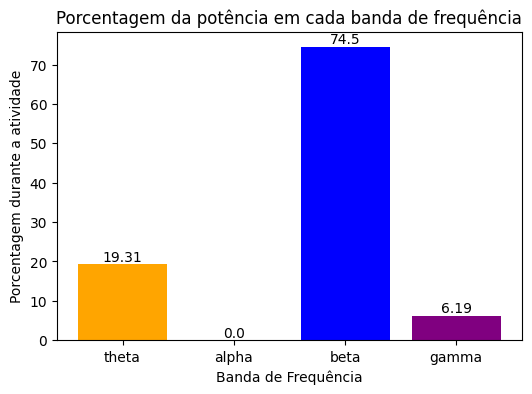

Glucagon Ativa - Teste


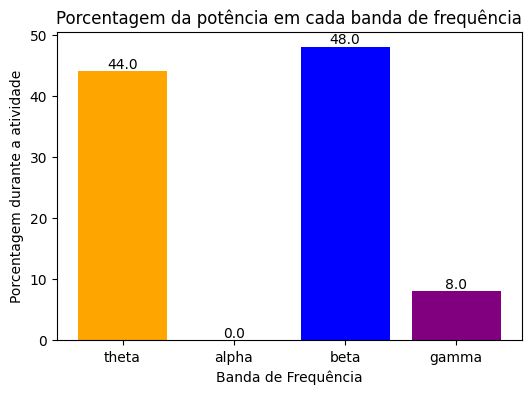

Insulina Ativa


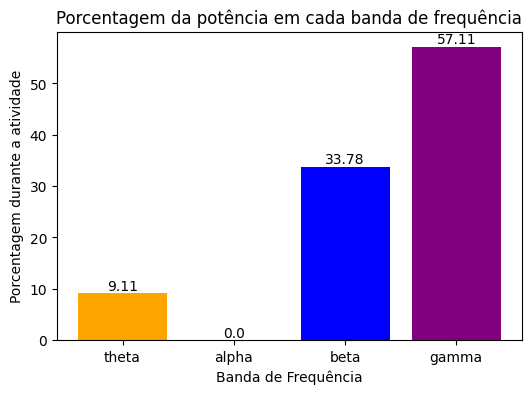

Insulina Ativa - Teste


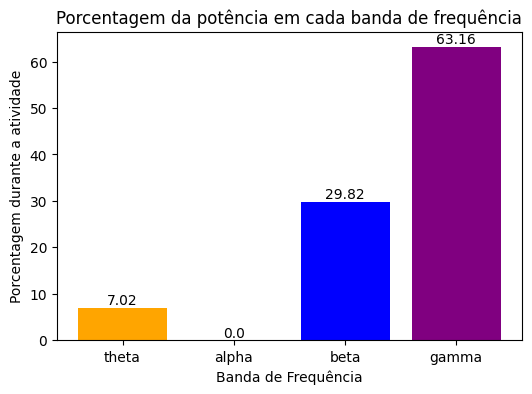

Teste Final


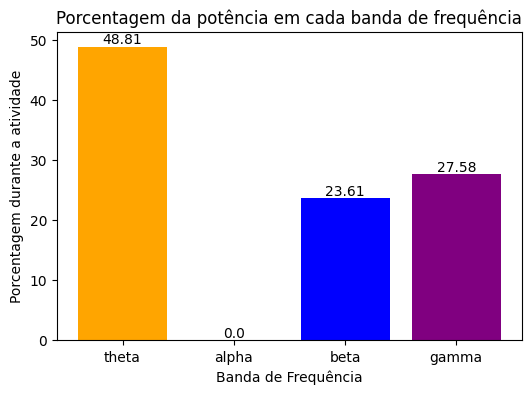

In [7]:
from matplotlib import rcParams

rcParams['figure.figsize'] = [6., 4.]

def plot_bar(x):
    colors = ('orange', 'green', 'blue', 'purple')
    bars = plt.bar(('theta', 'alpha', 'beta', 'gamma'), x, color=colors)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.title('Porcentagem da potência em cada banda de frequência')
    plt.xlabel('Banda de Frequência')
    plt.ylabel('Porcentagem durante a atividade')

    # Exibir o gráfico
    plt.show()

print('Glucagon Ativa')
plot_bar([19.31, 0.0, 74.5, 6.19])
print('Glucagon Ativa - Teste')
plot_bar([44.0, 0.0, 48.0, 8.0])
print('Insulina Ativa')
plot_bar([9.11, 0.0, 33.78, 57.11])
print('Insulina Ativa - Teste')
plot_bar([7.02, 0.0, 29.82, 63.16])
print('Teste Final')
plot_bar([48.81, 0.0, 23.61, 27.58])
